In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [4]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以花蓮縣選區立委蕭美琴為例，依照月份來統計數值資料的變化

In [5]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [6]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [7]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [8]:
hsiao = fb[fb.page_name == "蕭美琴 Bi-khim Hsiao"]
# 把時間格式轉換
hsiao['new_date'] = pd.to_datetime(hsiao['created_time_taipei']).dt.date
hsiao['post_hour'] = pd.to_datetime(hsiao['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
hsiao['month_year'] = pd.to_datetime(hsiao['new_date']).dt.to_period('M')
hsiao.head(1)

<ipython-input-8-154926aa63cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date'] = pd.to_datetime(hsiao['created_time_taipei']).dt.date
<ipython-input-8-154926aa63cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['post_hour'] = pd.to_datetime(hsiao['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-8-154926aa63cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
9727,237292960686_10156110870930687,237292960686,蕭美琴 Bi-khim Hsiao,政治人物,到瑞穗參加活動，剛好今天流動攤商來到瑞穗擺夜市，三人行就順道來吃個蚵仔煎晚餐。,NaN,photo,https://www.facebook.com/237292960686/posts/10...,2019-01-15T13:50:17+0000,2019-01-15T21:50:17,...,0,0,0,0,0,15,1,2019-01-15,21,2019-01


In [9]:
#發文時間分佈
post_time = hsiao[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,3
1,6,3
2,7,10
3,8,21
4,9,53
5,10,38
6,11,46
7,12,41
8,13,41
9,14,35


In [10]:
hsiao[hsiao.created_time_taipei == max(hsiao.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10265,237292960686_10156919675670687,237292960686,蕭美琴 Bi-khim Hsiao,政治人物,【花蓮的朋友準備好了嗎？#台鐵選舉返鄉列車今天晚上12點開放訂購囉🏃‍♀️】\n \n明年...,NaN,photo,https://www.facebook.com/237292960686/posts/10...,2019-12-26T13:00:33+0000,2019-12-26T21:00:33,...,0,0,0,0,0,91,107,2019-12-26,21,2019-12


In [11]:
hsiao[hsiao.created_time_taipei == min(hsiao.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
9747,237292960686_10156078929175687,237292960686,蕭美琴 Bi-khim Hsiao,政治人物,2019，依舊平安。\n\n2018年發生了許多事，所有起起落落都讓我們更珍惜當下，也更加堅...,NaN,photo,https://www.facebook.com/237292960686/posts/10...,2018-12-31T23:30:00+0000,2019-01-01T07:30:00,...,0,0,0,0,0,19,3,2019-01-01,7,2019-01


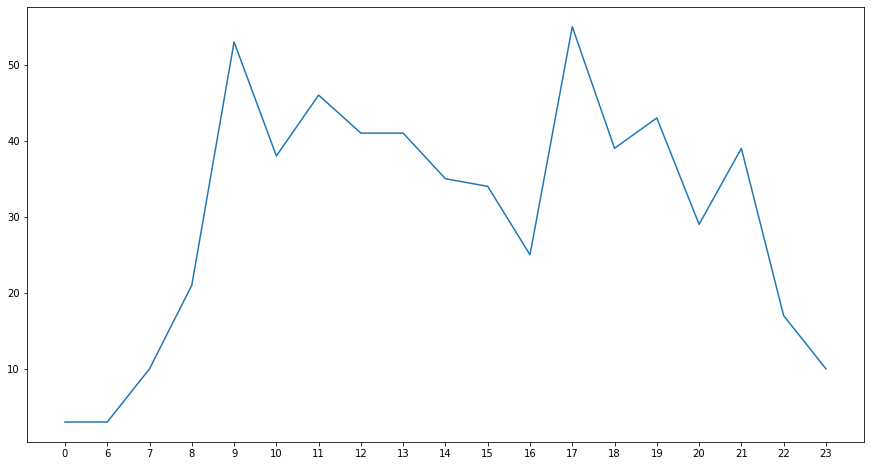

In [12]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [13]:
#整年貼文數量分佈
whole_year = hsiao[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,46
1,2019-02,45
2,2019-03,45
3,2019-04,45
4,2019-05,59
5,2019-06,38
6,2019-07,38
7,2019-08,49
8,2019-09,54
9,2019-10,45


In [14]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,12.000000
mean,48.500000
std,8.174239
min,38.000000
25%,45.000000
50%,45.500000
75%,52.500000
max,66.000000


In [15]:
results = hsiao.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,10915476191556,30283,0,0,0,0,0,1164,1122,703
2019-02,10678183230870,36992,0,0,0,0,0,1234,1048,693
2019-03,10678183230870,44645,0,0,0,0,0,1534,1398,699
2019-04,10678183230870,112074,0,0,0,0,0,5979,5200,636
2019-05,14000284680474,116775,0,0,0,0,0,4585,2711,857
2019-06,9017132506068,75847,0,0,0,0,0,2738,3670,530
2019-07,9017132506068,59575,0,0,0,0,0,1499,1320,640
2019-08,11627355073614,106077,0,0,0,0,0,4093,2174,676
2019-09,12813819877044,111926,0,0,0,0,0,2611,1672,765


In [16]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,10915476191556,30283,0,0,0,0,0,1164,1122,703
1,2019-02,10678183230870,36992,0,0,0,0,0,1234,1048,693
2,2019-03,10678183230870,44645,0,0,0,0,0,1534,1398,699
3,2019-04,10678183230870,112074,0,0,0,0,0,5979,5200,636
4,2019-05,14000284680474,116775,0,0,0,0,0,4585,2711,857
5,2019-06,9017132506068,75847,0,0,0,0,0,2738,3670,530
6,2019-07,9017132506068,59575,0,0,0,0,0,1499,1320,640
7,2019-08,11627355073614,106077,0,0,0,0,0,4093,2174,676
8,2019-09,12813819877044,111926,0,0,0,0,0,2611,1672,765
9,2019-10,10678183230870,83204,0,0,0,0,0,2445,1619,617


In [17]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
Name: newhead, dtype: object

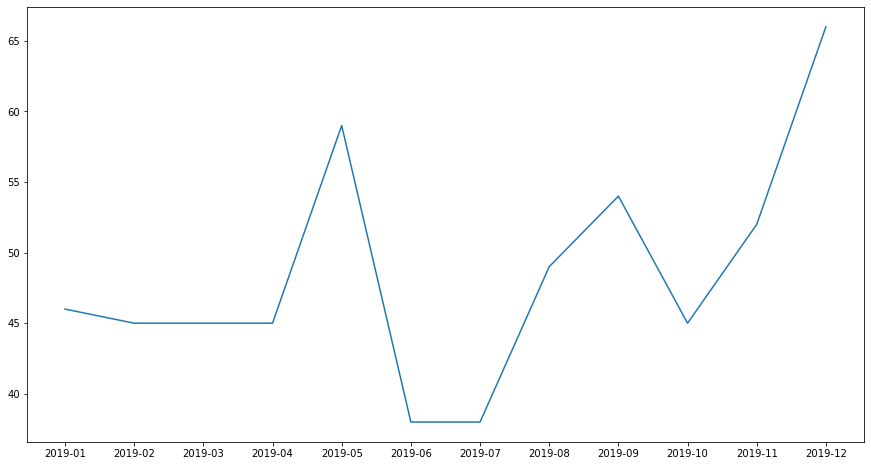

In [18]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [19]:
# 每個月的按讚、評論、分享總數 分佈
results = hsiao.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,10915476191556,30283,0,0,0,0,0,1164,1122,703
1,2019-02,10678183230870,36992,0,0,0,0,0,1234,1048,693
2,2019-03,10678183230870,44645,0,0,0,0,0,1534,1398,699
3,2019-04,10678183230870,112074,0,0,0,0,0,5979,5200,636
4,2019-05,14000284680474,116775,0,0,0,0,0,4585,2711,857
5,2019-06,9017132506068,75847,0,0,0,0,0,2738,3670,530
6,2019-07,9017132506068,59575,0,0,0,0,0,1499,1320,640
7,2019-08,11627355073614,106077,0,0,0,0,0,4093,2174,676
8,2019-09,12813819877044,111926,0,0,0,0,0,2611,1672,765
9,2019-10,10678183230870,83204,0,0,0,0,0,2445,1619,617


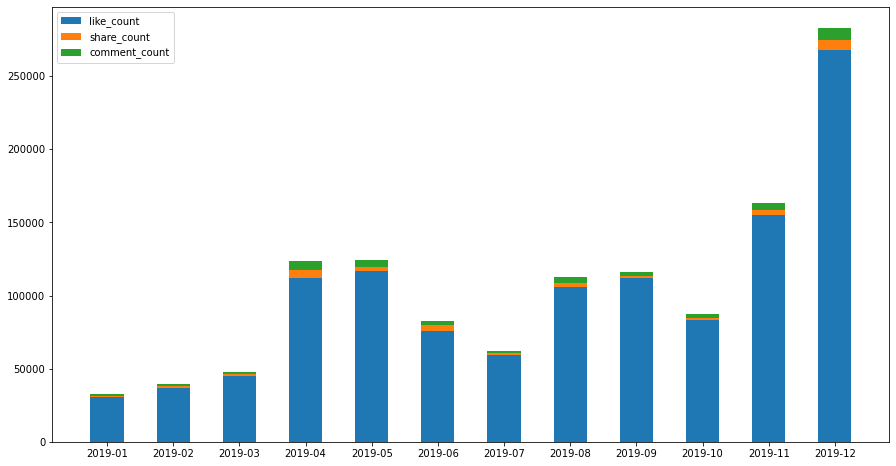

In [20]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [21]:
# 4、5月按讚、分享、評論數特別高，因此找出4、5月的資料
high = hsiao[hsiao.month_year == "2019-04"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-04-01,237292960686,290,0,0,0,0,0,6,2,15
1,2019-04-02,474585921372,2346,0,0,0,0,0,43,14,28
2,2019-04-03,474585921372,692,0,0,0,0,0,8,12,38
3,2019-04-04,474585921372,1327,0,0,0,0,0,80,23,31
4,2019-04-07,237292960686,3082,0,0,0,0,0,132,109,20
5,2019-04-08,237292960686,2376,0,0,0,0,0,124,43,21
6,2019-04-09,474585921372,3049,0,0,0,0,0,123,186,22
7,2019-04-10,474585921372,2419,0,0,0,0,0,109,44,20
8,2019-04-11,237292960686,355,0,0,0,0,0,7,15,10
9,2019-04-12,237292960686,1806,0,0,0,0,0,74,21,12


No handles with labels found to put in legend.


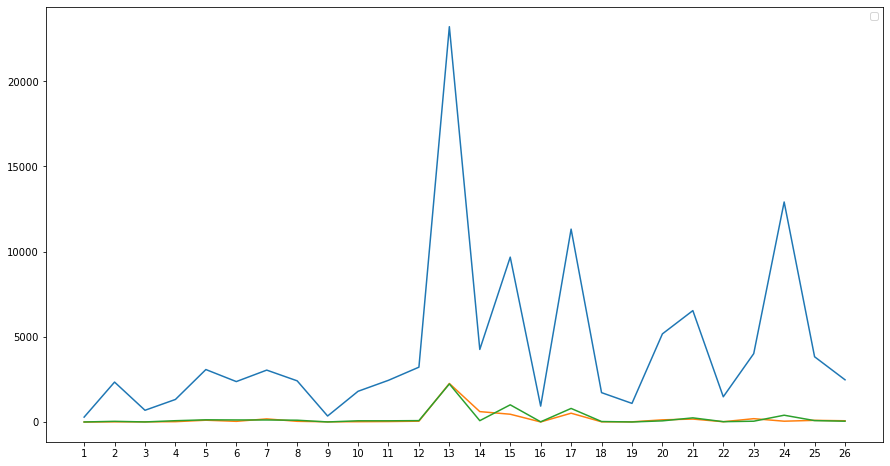

In [20]:
#畫圖 看整個四月按讚、分享、評論的流量
labels = [str(i) for i in range(1,27)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [21]:
# 4/16 號很明顯按讚衝高  因此找出這天的文章
hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str
Apr_16 = hsiao[hsiao['new_date'] == "2019-04-16"]
Apr_16[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-21-b07e320a03e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
9907,早上臨時被要求參加一場遠景的研討會，因原訂出席的王定宇委員臨時有事，我跟台美國會議員共六人講...,2237,23200


與郭台銘的爭執

In [22]:
# 4、5月按讚、分享、評論數特別高，因此找出4、5月的資料
higher = hsiao[hsiao.month_year == "2019-05"]
results_higher = higher.groupby('new_date').sum()
results_higher.index.name = 'newhead' #更改欄位名稱
results_higher.reset_index(inplace=True)
results_higher

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-05-01,949171842744,5281,0,0,0,0,0,107,182,48
1,2019-05-02,237292960686,1200,0,0,0,0,0,50,20,14
2,2019-05-03,237292960686,5192,0,0,0,0,0,78,168,13
3,2019-05-04,237292960686,5885,0,0,0,0,0,100,168,21
4,2019-05-05,237292960686,3351,0,0,0,0,0,43,16,23
5,2019-05-07,237292960686,946,0,0,0,0,0,21,13,18
6,2019-05-08,1186464803430,4679,0,0,0,0,0,83,77,64
7,2019-05-09,237292960686,694,0,0,0,0,0,21,24,10
8,2019-05-10,237292960686,358,0,0,0,0,0,5,3,9
9,2019-05-11,711878882058,5896,0,0,0,0,0,119,71,43


No handles with labels found to put in legend.


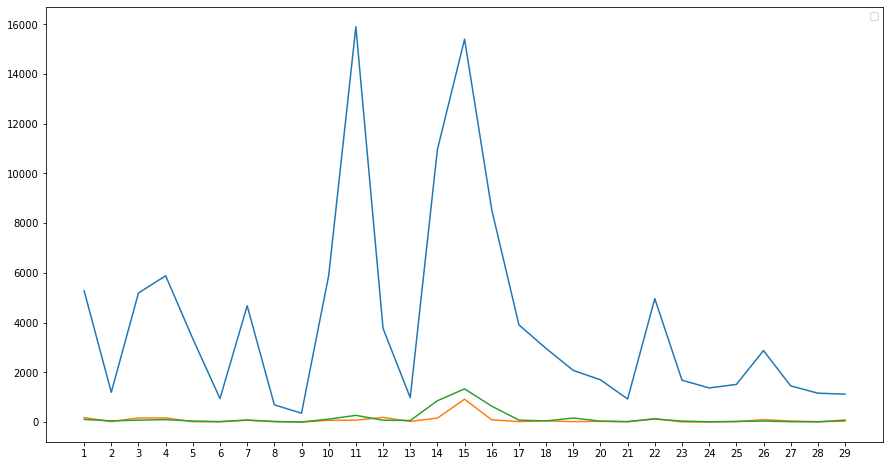

In [23]:
#畫圖 看整個五月按讚、分享、評論的流量
labels = [str(i) for i in range(1,30)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_higher['like_count'])
ax.plot(labels, results_higher['share_count'])
ax.plot(labels, results_higher['comment_count'])

ax.legend()

plt.show()

In [24]:
# 5/12 號很明顯按讚衝高  因此找出這天的文章
hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str
May_12 = hsiao[hsiao['new_date'] == "2019-05-12"]
May_12[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-24-914955f06faf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
9912,母親節，想到媽媽五十年前從美國嫁到台灣台南，在語言、文化、生活條件都陌生的國度，別說網路了，...,151,9892
9913,金針花又稱母親花，今天我用花蓮赤科山的金針花祝福所有辛苦的媽媽，謝謝家裡永遠的超人！ 母親...,120,6010


In [25]:
# 5/17 號很明顯按讚衝高  因此找出這天的文章
hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str
May_17 = hsiao[hsiao['new_date'] == "2019-05-17"]
May_17[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-25-0785f8c9ae77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
9960,主席，各位同仁，今天能夠跟大家一起努力，看到這部法的通過，我真是百感交集。我相信在台灣的人權...,1223,12562
9961,昨天，蘇院長提到在威權時期，冒著生命和失去自由的風險站出來辯護、站出來組黨的勇氣。真的讓人眼...,113,2838


In [26]:
#找出評論數量的統計值
hsiao['comment_count'].describe()

count     582.000000
mean       71.146048
std       151.494168
min         1.000000
25%        13.000000
50%        27.000000
75%        74.000000
max      2237.000000
Name: comment_count, dtype: float64

In [27]:
#找出按讚數量的統計值
hsiao['like_count'].describe()


count      582.000000
mean      2062.426117
std       2549.097415
min        101.000000
25%        672.500000
50%       1209.500000
75%       2280.000000
max      23200.000000
Name: like_count, dtype: float64

In [29]:
# 很明顯12月按讚、分享、評論數特別高，因此找出12月的資料
highest = hsiao[hsiao.month_year == "2019-12"]
results_highest = highest.groupby('new_date').sum()
results_highest.index.name = 'newhead' #更改欄位名稱
results_highest.reset_index(inplace=True)
results_highest

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-12-01,949171842744,21990,0,0,0,0,0,336,167,62
1,2019-12-02,237292960686,6114,0,0,0,0,0,276,169,11
2,2019-12-03,237292960686,2238,0,0,0,0,0,57,187,9
3,2019-12-04,711878882058,2466,0,0,0,0,0,40,44,36
4,2019-12-05,474585921372,4349,0,0,0,0,0,121,123,31
5,2019-12-06,711878882058,6456,0,0,0,0,0,119,128,39
6,2019-12-07,474585921372,3487,0,0,0,0,0,94,78,20
7,2019-12-09,237292960686,3733,0,0,0,0,0,81,68,10
8,2019-12-10,474585921372,5038,0,0,0,0,0,136,298,30
9,2019-12-11,711878882058,7128,0,0,0,0,0,182,190,46


No handles with labels found to put in legend.


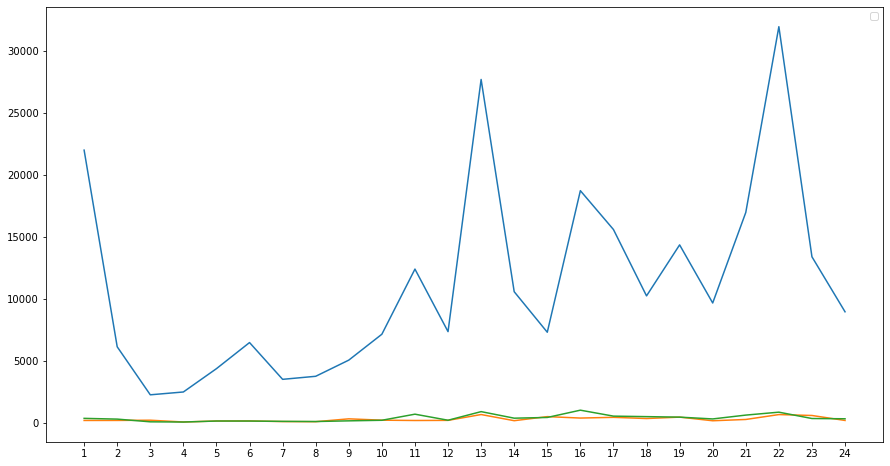

In [30]:
#畫圖 看整個12月按讚、分享、評論的流量
labels = [str(i) for i in range(1,25)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highest['like_count'])
ax.plot(labels, results_highest['share_count'])
ax.plot(labels, results_highest['comment_count'])

ax.legend()

plt.show()

In [31]:
# 12/1 號很明顯按讚衝高  因此找出這天的文章
hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str
Dec_01 = hsiao[hsiao['new_date'] == "2019-12-01"]
Dec_01[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-31-4ad694e49c97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
10255,明天一早立法院開會，在紙風車卡車藝術工程連三天帶來滿場孩子們的歡笑後，搭上最後一班到台北的火...,66,3948
10256,今天掃街碰到兩位弟弟William 和Justin，他們跳來跳去說「美琴阿姨我星期五有去北埔...,24,2149
10257,昨天晚上買花，老闆小女兒送了三顆玉米加切好的芭樂，讓我們路上不會因沒空吃晚餐而餓肚子。花蓮處...,200,13993
10258,【美琴會做事，政績報你知📣：推動農村各項建設👩‍🌾👨‍🌾】 在花蓮與我們農民朋友相處，我深...,46,1900


In [32]:
# 12/14 號很明顯按讚衝高  因此找出這天的文章
hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str
Dec_14 = hsiao[hsiao['new_date'] == "2019-12-14"]
Dec_14[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-32-d467caaf6041>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
10299,花蓮，是我的生命轉彎處。 我從國際外交領域急轉來到花蓮，一待就是十年，雖然常自嘲變成花蓮的村...,400,7842
10300,拜票開心碰到這位胖橘，可惜他不能投我！,372,14631
10301,有小火車、積木、抱枕、打卡牆、插畫通道、還有每日手沖咖啡......，這裡到底是競選總部，還...,108,5223


In [33]:
# 12/24 號很明顯按讚衝高  因此找出這天的文章
hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str
Dec_24 = hsiao[hsiao['new_date'] == "2019-12-24"]
Dec_24[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-33-548844f99bac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date']=hsiao['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
10273,直播前跟館長閒聊，覺得他是很有正義感的人。 謝謝他能跟我一起呼籲年輕人回家投票！,181,7970
10274,【#美琴尬館長｜直播中】 歡迎各位朋友來線上留言與美琴、館長互動，一起來支持我喔！ ...,30,1319
10275,謝謝今天國家級葛格焦糖 陳嘉行 Brother Caramel來陪我拜票，早上去福氣站和長輩...,94,3374
10276,會做事的團隊，做出最實在的成績！ 蘇花改1/6確定通車，向最辛苦的工程團隊致敬！ 回想這...,139,5586
10277,美琴尬館長，究竟會是怎麼樣的情形呢？我自己也很期待！ 今晚請鎖定館長 飆捍粉專，美琴競總也同...,159,8090
10278,今天美琴跟聖誕老人團到公園路中山路口和大家問早！ 謝謝路過的朋友和我們打招呼～揮揮手、...,233,5617


In [28]:
# 比較、查看他政見
promise = politics[politics.姓名 == "蕭美琴"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['73    鐵路便捷化', '推動北迴線三軌化、花東線雙軌化，增加鐵路運能與調度彈性；加速票務系統更新，剩餘票...']

In [34]:
#按讚次數最少的貼文 
lastlike_10 = hsiao.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
10266,【#2020年1月11日我們一起回家投票】 花蓮人12/27就可以訂購選舉返鄉車票囉！ ...,101,2019-12
9838,循環經濟進入體育世界的最高典範！ https://www.seinsights.asia/...,135,2019-03
9769,NaN,166,2019-01
9799,"今天在交通委員會討論酒駕問題, 除了我在內的多位委員提出提高刑責和罰款等加重處罰之外, 我特...",172,2019-02
9771,高俊明牧師，今天下午安息主懷。很多人稱他為人格者，台灣人權和獨立之路雖然崎嶇坎坷，背著台灣十...,177,2019-02
9760,隨著花蓮火車站新站啟用，站前交通堵塞的情形是大家都很關心的，動線問題的解決刻不容緩。 下午...,182,2019-01
9737,血庫存量告急，台北捐血中心到花蓮宣傳，同時花蓮警察局做反毒宣導，讓民眾瞭解現在毒品的各種樣貌...,184,2019-01
9808,【小型農機補助計畫來囉！】 為提升農業生產力，紓解農業勞動力不足問題，農委會編列預算補助農友...,184,2019-02
9755,【春節再加開列車＆實名票釋出】 春節假期再一波加開列車，另花東實名制列車仍有空位，臺鐵局將...,191,2019-01
9763,感謝最有企業責任的合作金庫雷董事長和棒球隊許總教練率爆米花聯盟二連霸冠軍球隊來到花蓮寒冬送暖...,192,2019-01


In [35]:
#最少讚數前10的文章的 種類 video / photo?
lastlike_10 = hsiao.sort_values(by = ['like_count'],ascending= True ).head(10)
lastlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
link,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
photo,7,7,7,7,6,1,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
status,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
video,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [36]:
#按讚次數最多的貼文 
mostlike_10 = hsiao.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
9907,早上臨時被要求參加一場遠景的研討會，因原訂出席的王定宇委員臨時有事，我跟台美國會議員共六人講...,23200,2019-04
10214,可愛的弟弟，去跟他媽媽要了一杯檸檬汁，原來不是自己要喝，而是要拿來給美琴阿姨的！ 然後他就戴...,19231,2019-11
10300,拜票開心碰到這位胖橘，可惜他不能投我！,14631,2019-12
10157,新看板正式上架了，很多朋友都說好看，你們覺得如何呢？ 因為經費拮据，看板上架速度慢了一些，...,14358,2019-10
10257,昨天晚上買花，老闆小女兒送了三顆玉米加切好的芭樂，讓我們路上不會因沒空吃晚餐而餓肚子。花蓮處...,13993,2019-12
10036,我這個老哥哥7/28到玉里193線演唱，農青禾市集+音樂會歡迎大家一起來！ #193農青禾音樂埕,13326,2019-07
10050,很多人說我瘦的時候長得跟 #殷琪 董事長很像！這次大陸工程承包仁水隧道工程，視察後跟她請教一...,13102,2019-08
9885,有人說我們長得很像，剛好黃益中到花蓮來，初次碰面來比一下。,12914,2019-04
9960,主席，各位同仁，今天能夠跟大家一起努力，看到這部法的通過，我真是百感交集。我相信在台灣的人權...,12562,2019-05
10164,立法院停班沒開會，早上到羅東搭車要回花蓮，下一班的普悠瑪號說沒位子，於是搭了區間快車。這個新...,11283,2019-09


In [37]:
#最多讚數前10的文章的 種類 video / photo?
mostlike_10 = hsiao.sort_values(by = ['like_count'],ascending= False ).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,8,8,8,8,8,0,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
status,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
video,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


1. 曝光度高的貼文多為地方深耕、地方建設、同婚法
2. 曝光度高較無跟總統、中國因素相關？（text mining驗證）